In [3]:
# Import required libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Load the dataset
df = pd.read_csv(r'C:\Users\isai5\OneDrive\Documentos\Github\databases\StressLevelDataset.csv')
df.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


In [5]:
# Prepare data for clustering (excluding 'stress_level')
X_cluster = df.drop('stress_level', axis=1).select_dtypes(include=['number'])

from sklearn.cluster import KMeans

# Create and fit the KMeans model with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(X_cluster)


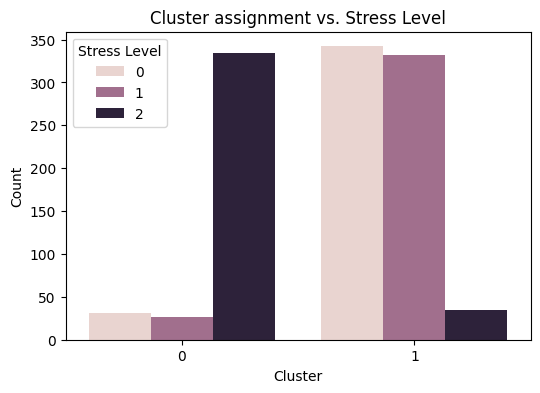

In [6]:
# Add cluster labels to the dataframe
df['cluster'] = clusters

# Visualize the clustering result vs. actual stress_level
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.countplot(x='cluster', hue='stress_level', data=df)
plt.title('Cluster assignment vs. Stress Level')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Stress Level')
plt.show()

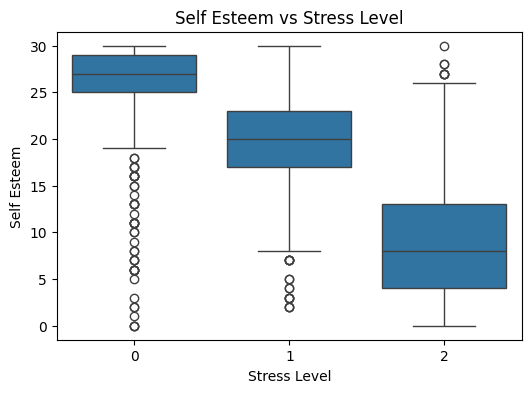

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))
sns.boxplot(x='stress_level', y='self_esteem', data=df)
plt.title('Self Esteem vs Stress Level')
plt.xlabel('Stress Level')
plt.ylabel('Self Esteem')
plt.show()

In [8]:
correlation = df['self_esteem'].corr(df['stress_level'])
print(f'Correlation between self_esteem and stress_level: {correlation:.2f}')

Correlation between self_esteem and stress_level: -0.76


In [11]:

correlations_with_stress = df.corr()['stress_level'].sort_values(ascending=False)
print(correlations_with_stress)


stress_level                    1.000000
bullying                        0.751162
future_career_concerns          0.742619
anxiety_level                   0.736795
depression                      0.734379
headache                        0.713484
extracurricular_activities      0.692977
peer_pressure                   0.690684
noise_level                     0.663371
mental_health_history           0.648644
study_load                      0.634156
breathing_problem               0.573984
blood_pressure                  0.394200
living_conditions              -0.581723
social_support                 -0.632497
teacher_student_relationship   -0.680163
cluster                        -0.703984
basic_needs                    -0.708968
safety                         -0.709602
academic_performance           -0.720922
sleep_quality                  -0.749068
self_esteem                    -0.756195
Name: stress_level, dtype: float64
